In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import paper_tools
import census
import numpy as np
#load the census data
#sheffield
#bbox = np.array([430,440,381,391])
bbox = np.array([433,437,384,388])
shapefilename='oaboundaries/Output_Area_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp'
oafilename='oa_to_lsoa/OA11_LSOA11_MSOA11_LAD11_EW_LUv2.csv'
randomoafilename = 'oa_to_lsoa/RANDOM_SOAS_2.csv' #this file contains MSOA that have been randomly assigned
oadescfilename='oadata/KS102ew_2011_oa/KS102EW_2011STATH_NAT_OA_REL_1.4.4/KS102EWDESC0.CSV'
oadatafilename='oadata/KS102ew_2011_oa/KS102EWDATA.CSV'

#X,Y,testX,testY = census.get_census_data(box=bbox*1000,verbose=True)
X,Y,testX,testY = census.get_census_data(shapefilename=shapefilename,
                                         oafilename=randomoafilename,
                                         oadescfilename=oadescfilename,
                                         oadatafilename=oadatafilename,
                                         box=bbox*1000,verbose=True,refresh=False)

Trying cache...
Cache loaded.
Loaded from cache, 49 training polygons and 358 testing polygons


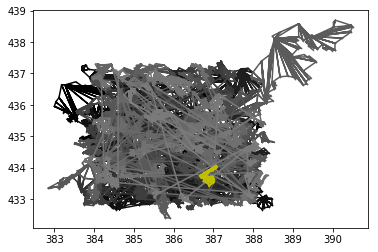

In [21]:

for i,x in enumerate(X):
    c = np.array([1,1,1])*(i/len(X))/2
    plt.plot(x[1::2],x[0::2],'.-',markersize=1,color=c)
plt.plot(testX[3,1::2],testX[3,0::2],'y-')

In [22]:
from shapeintegrals_fast_hypercubes import ShapeIntegralHC
from shapeintegrals_fast import ShapeIntegral
import GPy

In [23]:
#testX = testX[0:5,:]
#testY = testY[0:5,:]

In [ ]:
for ls in [0.025,0.05,0.1,0.2,0.4]:
    for var in [10,100,1000]:
        #var = 100.0
        for gnoise in [0.1,1,10,100]:
            for Nper in [1,2,4,8,16]:
                try:
                    k = ShapeIntegralHC(X.shape[1],Nrecs=Nper,input_space_dim=2,lengthscale=ls*np.array([1.0,1.0]),variances=np.array(var))
                    m = GPy.models.GPRegression(X,Y,k)
                    m.Gaussian_noise=gnoise
                    np.set_printoptions(precision=2,suppress=True)
                    hc_predY, _ = m.predict(testX)
                    kern = GPy.kern.RBF(2, lengthscale=ls, variance = var, ARD=False)
                    oldshapek = ShapeIntegral(X.shape[1],input_space_dim=2,Nperunit=Nper,kernel=kern)
                    m = GPy.models.GPRegression(X,Y,oldshapek)
                    m.Gaussian_noise=gnoise
                    predY,_=m.predict(testX)#[0:3,:])
                    print("%0.4f, %0.4f, %0.4f, %d, %0.4f, %0.4f" % (ls,var,gnoise,Nper,np.mean(np.abs(predY-testY)),np.mean(np.abs(hc_predY-testY))))
                except:
                    print("%0.4f, %0.4f, %0.4f, %d, None, None" % (ls,var,gnoise,Nper))

 /home/mike/Documents/Research/SheffieldMLpublications/publications/integralkernel/jupyter/rectangles.py:235: RuntimeWarning:divide by zero encountered in double_scalars


 /home/mike/Documents/Research/SheffieldMLpublications/publications/integralkernel/jupyter/shapeintegrals_fast.py:77: RuntimeWarning:divide by zero encountered in true_divide


0.0250, 10.0000, 0.1000, 1, 331.3472, 319.7384
0.0250, 10.0000, 0.1000, 2, 326.7017, 318.8957
0.0250, 10.0000, 0.1000, 4, None, None
0.0250, 10.0000, 0.1000, 8, None, None
0.0250, 10.0000, 0.1000, 16, None, None
0.0250, 10.0000, 1.0000, 1, None, None


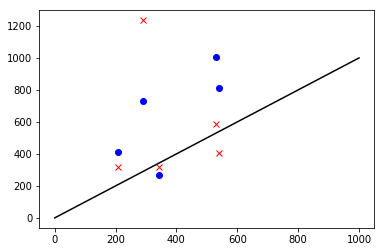

In [15]:
plt.plot(testY,hc_predY,'ob')
plt.plot(testY,predY,'xr')
plt.plot([0,1000],[0,1000],'k-')

In [16]:
print(np.mean(np.abs(predY-testY)),np.mean(np.abs(hc_predY-testY)))

254.70683522173198 294.36066877385144


In [63]:
newX, startindices,allvolscales,volcorrections, allpolys, allrecs = rectangles.compute_newX(X,Nrecs=30,step=0.025,Ntrials=30)

NameError: name 'rectangles' is not defined

In [42]:
pvols

[1.1149820416396294, 0.4058288976225722, 0.44013493805255016]

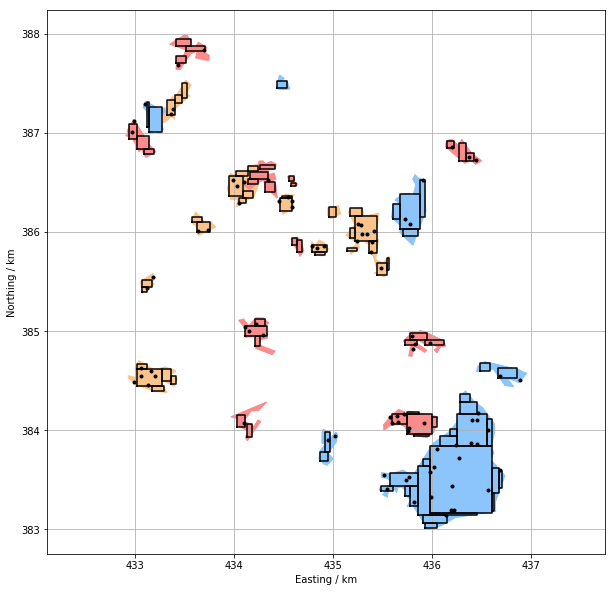

In [43]:
import rectangles
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,10])
rectangles.plotpolys(allpolys,allrecs)
for p in ps:
    plt.plot(p[:,0],p[:,1],'.k')
plt.savefig('rectangle_example.pdf')

In [56]:
##point estimates for this map
import GPy
import time
from shapeintegrals_fast import ShapeIntegral
best = np.array([[2.1223001684, 0.1056514968, 0.3241539519],[0.1056514968, 0.2134368515, 0.1346223552],[0.3241539519, 0.1346223552, 0.1614588299]])
pointresarray = []
for Nperunit in [16,32,64,128]:
    res = []
    start = time.time()
    for it in range(150):
        kern = GPy.kern.RBF(2, lengthscale=1.0, variance = 3.0, ARD=False)
        k = ShapeIntegral(X.shape[1],input_space_dim=2,Nperunit=Nperunit,kernel=kern)
        res.append(k.K(X,X))
        
    end = time.time()
    pointresarray.append([Nperunit,end-start,np.mean(np.abs(np.mean(np.array(res)-best,0)))])
    print(pointresarray[-1])

 /home/mike/Documents/Research/SheffieldMLpublications/publications/integralkernel/jupyter/shapeintegrals_fast.py:77: RuntimeWarning:divide by zero encountered in true_divide


[16, 3.726747751235962, 0.019735820915177383]
[32, 4.290496110916138, 0.00842739498033899]
[64, 5.65622091293335, 0.0007416797929710321]
[128, 7.397902965545654, 0.0003682685577560325]


In [44]:
#import pickle
#pickle.dump(res,open('res.p','wb'))

In [48]:
#np.set_printoptions(precision=10,suppress=True)
#print(np.mean(res,0)-1.96*np.std(res,0)/np.sqrt(len(res)))
#print(np.mean(res,0)+1.96*np.std(res,0)/np.sqrt(len(res)))

[[2.1221524779 0.1056359788 0.3241200579]
 [0.1056359788 0.213429334  0.1346159599]
 [0.3241200579 0.1346159599 0.1614532566]]
[[2.1224478589 0.1056670149 0.3241878459]
 [0.1056670149 0.2134443689 0.1346287505]
 [0.3241878459 0.1346287505 0.1614644032]]


In [49]:
#1.96*np.std(res,0)/np.sqrt(len(res))

array([[0.0001476905, 0.0000155181, 0.000033894 ],
       [0.0000155181, 0.0000075174, 0.0000063953],
       [0.000033894 , 0.0000063953, 0.0000055733]])

In [50]:
#np.mean(res,0)

array([[2.1223001684, 0.1056514968, 0.3241539519],
       [0.1056514968, 0.2134368515, 0.1346223552],
       [0.3241539519, 0.1346223552, 0.1614588299]])

In [57]:
import GPy
import time
from shapeintegrals_fast_hypercubes import ShapeIntegralHC as Integral
#best = np.array([[2.12218859, 0.1056407 ],[0.1056407,  0.21341685]])
#best = np.array([[2.13132188, 0.10561741],[0.10561741, 0.21343597]])
best = np.array([[2.1223001684, 0.1056514968, 0.3241539519],[0.1056514968, 0.2134368515, 0.1346223552],[0.3241539519, 0.1346223552, 0.1614588299]])
rectresarray = []
for Nrecs in [16,32,64,128]:
    res = []
    start = time.time()
    for it in range(50):
        k = Integral(X.shape[1],input_space_dim=2,Nrecs=Nrecs,lengthscale=1.0*np.array([1.0,1.0]),variances=np.array(3.0))
        res.append(k.K(X,X))
        
    end = time.time()
    rectresarray.append([Nrecs,end-start,np.mean(np.abs(np.mean(np.array(res)-best,0)))])
    print(rectresarray[-1])

[16, 127.9190948009491, 0.004914474584606709]
[32, 170.35568952560425, 0.001848089007203243]
[64, 298.03591132164, 0.00020455968017733285]


KeyboardInterrupt: 

In [58]:
np.mean(np.abs(np.mean(np.array(res)-best,0)))

0.00020644758893016688

In [14]:
#print(pointresarray)
#print(rectresarray)

[[16, 1.2814011573791504, 0.016345139215869893], [32, 1.4691030979156494, 0.010849502289358801]]
[[16, 27.02005386352539, 0.005988747783350126], [32, 34.105642557144165, 0.0024359591087222084]]
